In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Dataset\Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df = df.drop(columns = ['Serial No.'])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


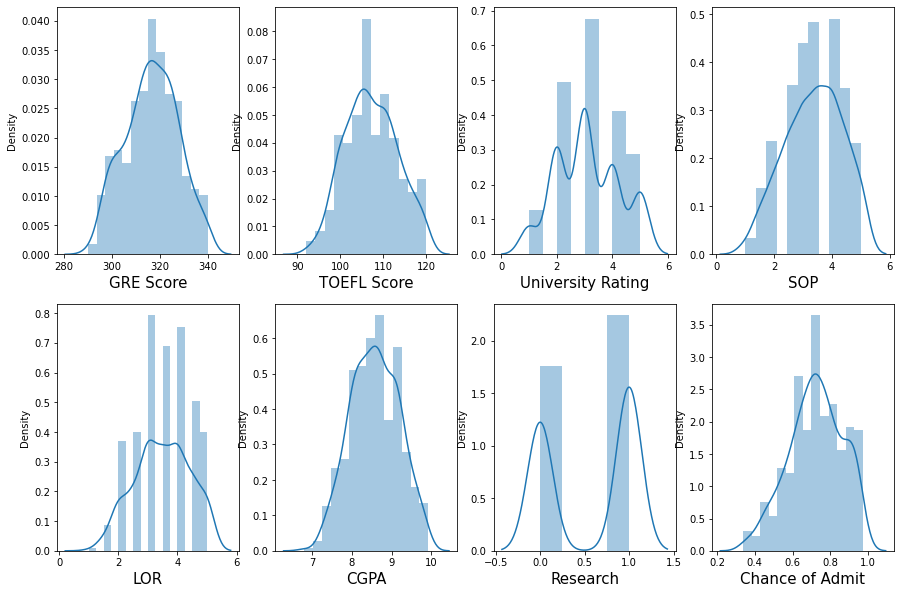

In [10]:
plt.figure(figsize = (15,10),facecolor = 'white')
plt_num = 1

for column in df:
    if plt_num<=8:
        ax = plt.subplot(2,4,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 15)
    plt_num+=1
plt.show()

In [11]:
y = df['Chance of Admit']
x = df.drop(columns = ['Chance of Admit'])

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

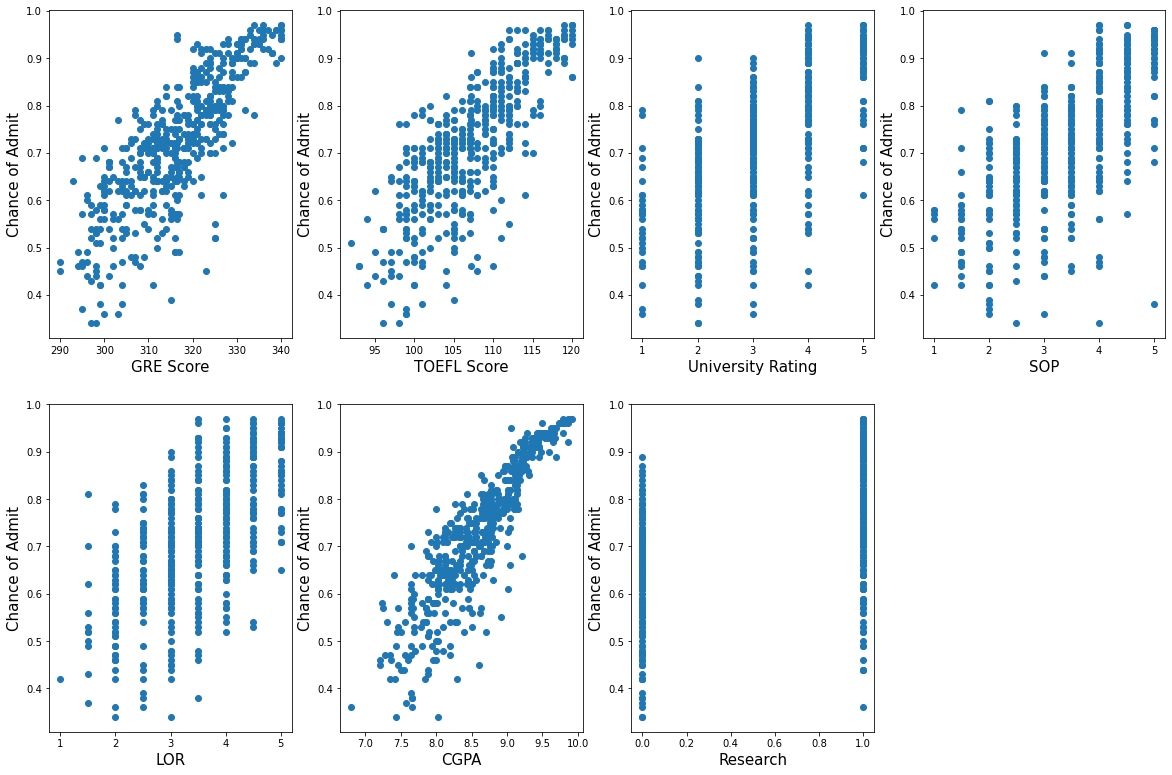

In [14]:
plt.figure(figsize = (20,35))
plt_num = 1

for column in x:
    if plt_num<15:
        ax = plt.subplot(5,4,plt_num)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 15)
        plt.ylabel('Chance of Admit',fontsize = 15)
    plt_num+=1
plt.show()

In [15]:
sc = StandardScaler()

In [16]:
x_sc = sc.fit_transform(x)

In [17]:
x_sc

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 323) 
y_train.head()

78     0.44
171    0.89
154    0.80
265    0.71
134    0.89
Name: Chance of Admit, dtype: float64

In [19]:
r = LinearRegression()

In [20]:
r.fit(x_train,y_train)

LinearRegression()

In [21]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [22]:
print('Chance of admission : ', r.predict(sc.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]])))

Chance of admission :  [0.70602538]


In [23]:
print('Chance of admission : ', r.predict(sc.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of admission :  [0.82689498]


In [24]:
filename = 'admissio_model.pickel'
pickle.dump(r,open(filename,'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

a = loaded_model.predict(sc.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]]))
a

array([0.70602538])

In [25]:
r.score(x_train,y_train)

0.8219512009081209

In [26]:
r.score(x_test,y_test)

0.8125809128540746

In [27]:
y_pred = r.predict(x_test)

In [28]:
y_pred

array([0.72962282, 0.94684997, 0.64743246, 0.85308053, 0.84107013,
       0.78221847, 0.6106612 , 0.62446492, 0.82446077, 0.71827929,
       0.64798822, 0.79540446, 0.72911947, 0.50335167, 0.79205525,
       0.67869331, 0.51681922, 0.5769851 , 0.59484473, 0.82515732,
       0.78626585, 0.70727203, 0.60623517, 0.78739986, 0.78476073,
       0.85453737, 0.78162541, 0.58240106, 0.58323503, 0.72999217,
       0.68156254, 0.58627739, 0.5625913 , 0.7729838 , 0.65233795,
       0.62597992, 0.61721882, 0.76158331, 0.56214794, 0.83264717,
       0.75649261, 0.74754109, 0.62673314, 0.62605173, 0.9204128 ,
       0.70026047, 0.75127863, 0.63426177, 0.88137973, 0.99902269,
       0.60666463, 0.82387701, 0.88740287, 0.64678434, 0.76314902,
       0.72212229, 0.76349531, 0.49979327, 0.70701776, 0.87531165,
       0.48902332, 0.5994108 , 0.88167209, 0.63639462, 0.70772436,
       0.53824566, 0.70796217, 0.58568258, 0.7866568 , 0.76087021,
       0.77679018, 0.64071523, 0.90724871, 0.93808451, 0.88494

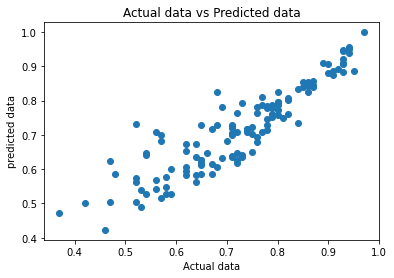

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual data')
plt.ylabel('predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

In [30]:
y_pred = r.predict(x_test)

In [31]:
mean_absolute_error(y_test,y_pred)

0.04350796028272817

In [32]:
mean_squared_error(y_test,y_pred)

0.0033058999718234092

In [33]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.057496956196162324

In [34]:
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(x_train,y_train)

LassoCV(normalize=True)

In [35]:
alpha = lacv.alpha_
alpha

2.3018456324880496e-05

In [36]:
las_reg = Lasso(alpha)
las_reg.fit(x_train,y_train)

Lasso(alpha=2.3018456324880496e-05)

In [37]:
las_reg.score(x_test,y_test)

0.8125935793919129

In [38]:
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [39]:
ridcv.alpha_

0.011

In [40]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(x_train,y_train)

Ridge(alpha=0.011)

In [41]:
rd.score(x_test,y_test)

0.8125804518999468